![Image of Yaktocat](https://www.superoffice.com/globalassets/blog/2022/customer-profile-analysis/customer-profile-analysis-1200x640_blog-cover.png?v=4962a2)

- In this project we are going to address below mentioned questions:
    
- Given the dataset attached in the folder, analyze how different customers respond to particular categories of products.

a)       Which new customers can the company target for high-cost products?

b)      Which old customers has the company consistently relied on?

c)       For which old customers are targeting efforts, not going to yield much benefit?

d)      Which new customers have the danger of going into territory-c ?

 

Using ‘spending’ behaviour, classify the customers into atleast 4 categories.

What are the characteristics of customers who are the highest buyers of Meat products?

In [1]:
# Importing Necessary Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
sns.set(style="ticks", context="talk")
plt.style.use('dark_background')
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from tqdm import tqdm
import warnings
warnings.simplefilter('ignore')

# <a name='Data_Description'></a>

<div style="border-radius:10px;
            background-color:#ffff00;
            border-style: solid;
            border-color: #0b0265;
            letter-spacing:0.5px;">

<center><h3 style="padding: 5px 0px; color:#000000; font-weight: bold; font-family: Cursive">
Data Description</h3></center>
</div>
>
</div>
>

**People:**

* `ID`: Customer's unique identifier
* `Year_Birth`: Customer's birth year
* `Education`: Customer's education level
* `Marital_Status`: Customer's marital status
* `Income`: Customer's yearly household income
* `Kidhome`: Number of children in customer's household
* `Teenhome`: Number of teenagers in customer's household
* `Dt_Customer`: Date of customer's enrollment with the company
* `Recency`: Number of days since customer's last purchase
* `Complain`: 1 if the customer complained in the last 2 years, 0 otherwise

**Products:**

* `MntWines`: Amount spent on wine in last 2 years
* `MntFruits`: Amount spent on fruits in last 2 years
* `MntMeatProducts`: Amount spent on meat in last 2 years
* `MntFishProducts`: Amount spent on fish in last 2 years
* `MntSweetProducts`: Amount spent on sweets in last 2 years
* `MntGoldProds`: Amount spent on gold in last 2 years

**Promotion:**

* `NumDealsPurchases`: Number of purchases made with a discount
* `AcceptedCmp1`: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
* `AcceptedCmp2`: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
* `AcceptedCmp3`: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
* `AcceptedCmp4`: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
* `AcceptedCmp5`: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
* `Response`: 1 if customer accepted the offer in the last campaign, 0 otherwise

**Place:**

* `NumWebPurchases`: Number of purchases made through the company’s website
* `NumCatalogPurchases`: Number of purchases made using a catalogue
* `NumStorePurchases`: Number of purchases made directly in stores
* `NumWebVisitsMonth`: Number of visits to company’s website in the last month
- NumWebVisitsMonth: Number of visits to the website per month.
- AcceptedCmp1-5: Whether the individual accepted marketing campaigns 1 through 5.
- Complain: Whether the individual has ever complained.
- Z_CostContact: Cost of contacting the individual.
- Z_Revenue: Revenue generated from contacting the individual.
- Response: Whether the individual responded to the marketing campaign.

# <a name='Data_Analysis_and_Visualization'></a>

<div style="border-radius:10px;
            background-color:#ffff00;
            border-style: solid;
            border-color: #0b0265;
            letter-spacing:0.5px;">

<center><h3 style="padding: 5px 0px; color:#000000; font-weight: bold; font-family: Cursive">
Data Validation and Preparation</h3></center>
</div>


In [2]:
data = pd.read_csv("customers.csv", delimiter=";")
df = data.copy()
data.head(10)

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   
5  7446        1967      Master       Together  62513.0        0         1   
6   965        1971  Graduation       Divorced  55635.0        0         1   
7  6177        1985         PhD        Married  33454.0        1         0   
8  4855        1974         PhD       Together  30351.0        1         0   
9  5899        1950         PhD       Together   5648.0        1         1   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  2012-09-04       58       635  ...                  7             0   
1  2014-03-08       38        11  ...                  5             0   
2  2013-08-21       26       426  ...                  4             0   
3  2014-02-10       26        11  ...                  6             0   
4  2014-01-19       94       173  ...                  5             0   
5  2013-09-09       16       520  ...                  6             0   
6  2012-11-13       34       235  ...                  6             0   
7  2013-05-08       32        76  ...                  8             0   
8  2013-06-06       19        14  ...                  9             0   
9  2014-03-13       68        28  ...                 20             1   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   
5             0             0             0             0         0   
6             0             0             0             0         0   
7             0             0             0             0         0   
8             0             0             0             0         0   
9             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  
5              3         11         0  
6              3         11         0  
7              3         11         0  
8              3         11         1  
9              3         11         0  

[10 rows x 29 columns]

In [3]:
print('Total no. of rows:',data.shape[0])
print('Total no. of columns:',data.shape[1])

Total no. of rows: 2240
Total no. of columns: 29


# Let's check for missing information and duplicated records in the dataset:

- Missing Information: We'll look for any blank or null values in the dataset, which could indicate missing information.
- Duplicated Records: We'll search for any rows that are exact duplicates of each other, suggesting duplicated entries in the dataset.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
data.head(3)

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  2012-09-04       58       635  ...                  7             0   
1  2014-03-08       38        11  ...                  5             0   
2  2013-08-21       26       426  ...                  4             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  

[3 rows x 29 columns]

In [6]:
data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [7]:
# Handling the missing values here:
data.dropna(inplace=True)

In [8]:
data.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [9]:
# checking presence of duplicate records
data.duplicated().sum()

0

In [10]:
# putting the column names in a list
column_names = data.columns.tolist()
null_count = data.isnull().sum()
null_ratio = round(data.isnull().mean(),3)
nunique = data.nunique()
#display the dataframe with all the information
pd.DataFrame(np.vstack((column_names,null_count,null_ratio, nunique)).T, 
             columns = ['Columns','Null Count','Null Ratio','Unique Values'])

Columns Null Count Null Ratio Unique Values
0                    ID          0        0.0          2216
1            Year_Birth          0        0.0            59
2             Education          0        0.0             5
3        Marital_Status          0        0.0             8
4                Income          0        0.0          1974
5               Kidhome          0        0.0             3
6              Teenhome          0        0.0             3
7           Dt_Customer          0        0.0           662
8               Recency          0        0.0           100
9              MntWines          0        0.0           776
10            MntFruits          0        0.0           158
11      MntMeatProducts          0        0.0           554
12      MntFishProducts          0        0.0           182
13     MntSweetProducts          0        0.0           176
14         MntGoldProds          0        0.0           212
15    NumDealsPurchases          0        0.0            15
16      NumWebPurchases          0        0.0            15
17  NumCatalogPurchases          0        0.0            14
18    NumStorePurchases          0        0.0            14
19    NumWebVisitsMonth          0        0.0            16
20         AcceptedCmp3          0        0.0             2
21         AcceptedCmp4          0        0.0             2
22         AcceptedCmp5          0        0.0             2
23         AcceptedCmp1          0        0.0             2
24         AcceptedCmp2          0        0.0             2
25             Complain          0        0.0             2
26        Z_CostContact          0        0.0             1
27            Z_Revenue          0        0.0             1
28             Response          0        0.0             2

Year_Birth and Dt_Customer that indicates the date a customer joined the database is not parsed as DateTime

In [11]:
# change the datatype for date added to datetime for better analysis
data['Year_Birth '] = data['Year_Birth'].apply(pd.to_datetime)
data['Dt_Customer'] = data['Dt_Customer'].apply(pd.to_datetime)

In [12]:
# creating a age column based on the Year_Birth and today's date
data['Age'] = 2024 - data['Year_Birth']

Creating a total column based on the total expenditure of the client

In [13]:
data['Total'] = data['MntWines'] + data['MntFruits'] + data['MntMeatProducts'] + data['MntFishProducts'] + data['MntSweetProducts'] + data['MntGoldProds']

Creating new features which somewhat have affect on expenditure

In [14]:
data['num_children'] = data['Kidhome'] + data['Teenhome']

In [15]:
data['num_family'] = data['Marital_Status'].apply(lambda x: 2 if x in ['Married', 'Together'] else 1) + data['num_children']

In [16]:
data['Education'] = data['Education'].map(lambda x: 'Undergraduate' if x in ['Basic', '2n Cycle'] else 'Graduate' if x == 'Graduation' else 'Postgraduate' if x in ['Master', 'PhD'] else x)

In [17]:
data.drop(['Z_CostContact', 'Z_Revenue'],axis=1,inplace=True)

# <a name='Data_Analysis_and_Visualization'></a>

<div style="border-radius:10px;
            background-color:#ffff00;
            border-style: solid;
            border-color: #0b0265;
            letter-spacing:0.5px;">

<center><h3 style="padding: 5px 0px; color:#000000; font-weight: bold; font-family: Cursive">
Data Insights from Visualization</h3></center>
</div>

In [18]:
percentile_unique={}
for i in data.columns:
      percentile_unique[i]=data[i].value_counts(dropna=False,normalize=True)*100

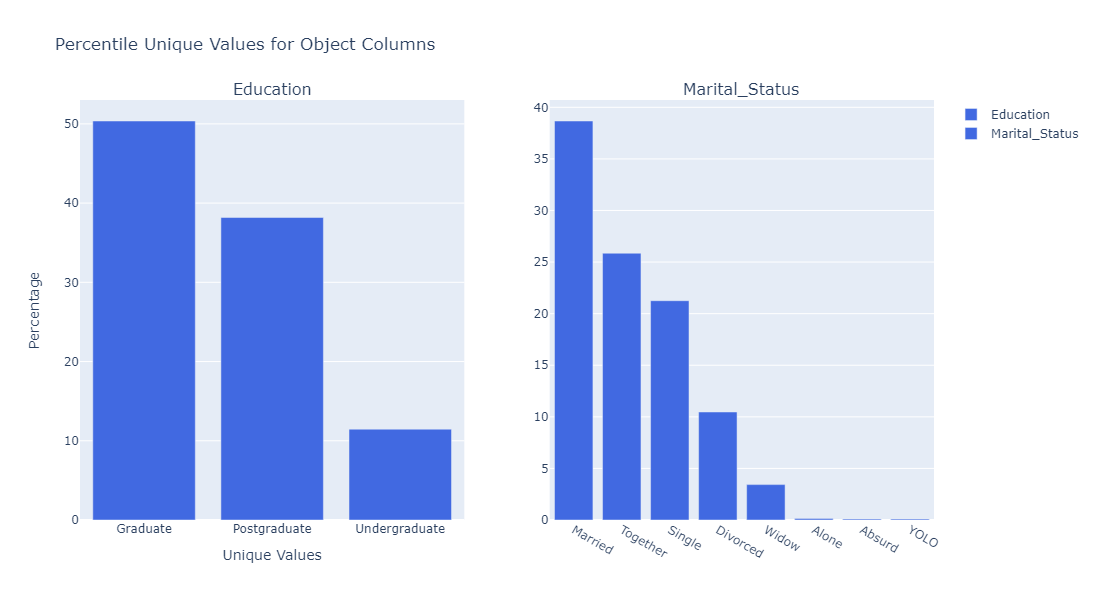

In [19]:
object_columns = [col for col, dtype in data.dtypes.items() if dtype == 'object']

fig = make_subplots(rows=1, cols=len(object_columns), subplot_titles=object_columns)

for i, column in enumerate(object_columns, start=1):
    value_counts = data[column].value_counts(dropna=False, normalize=True) * 100
    fig.add_trace(go.Bar(x=value_counts.index, y=value_counts.values, name=column, marker_color='royalblue'), row=1, col=i)

fig.update_layout(title='Percentile Unique Values for Object Columns',
                  xaxis_title='Unique Values',
                  yaxis_title='Percentage',
                  height=600, width=1000)
fig.show()

<Figure size 1300x800 with 0 Axes>

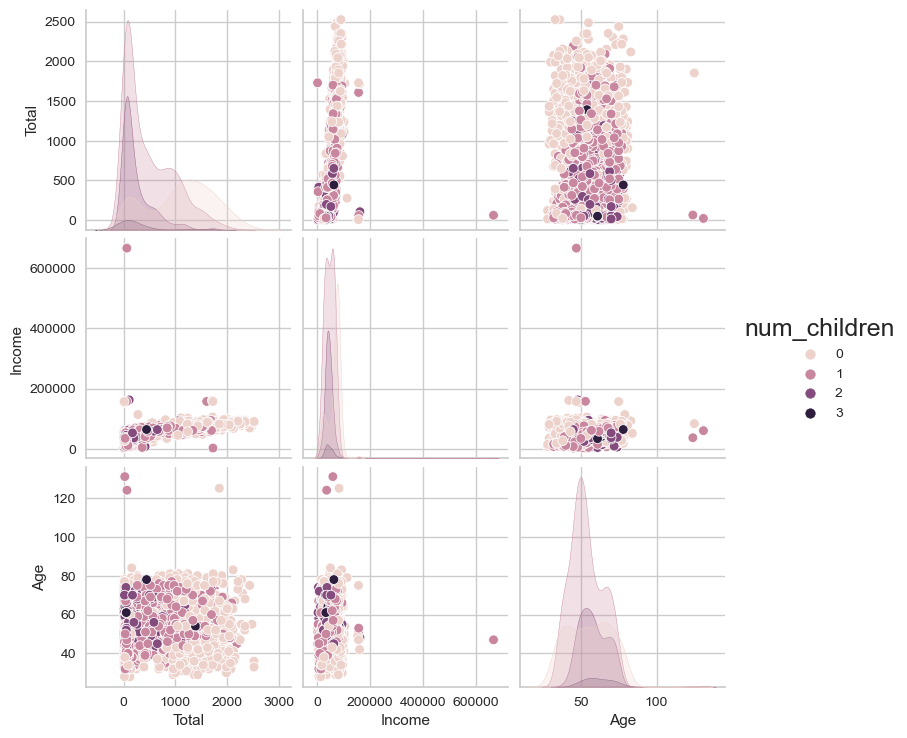

In [20]:
plt.figure(figsize=(13, 8))
sns.pairplot(data , vars=['Total','Income','Age'] , hue='num_children');

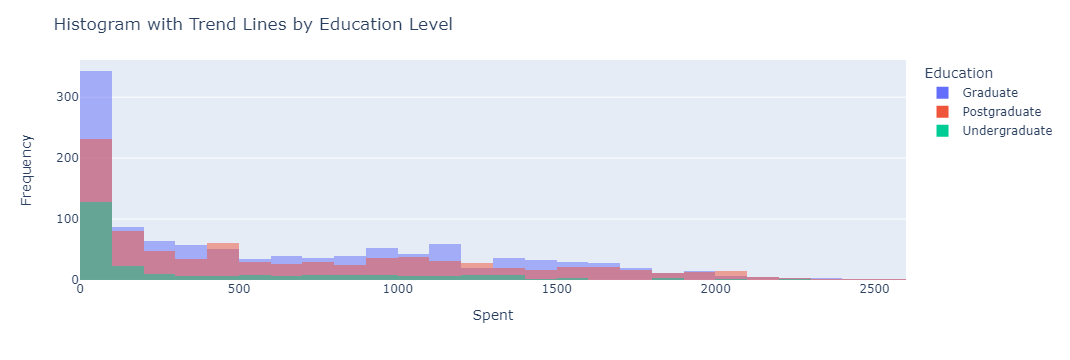

In [21]:
fig = px.histogram(data, x='Total', color='Education', histfunc='avg', barmode='overlay')
fig.update_layout(title='Histogram with Trend Lines by Education Level', xaxis_title='Spent', yaxis_title='Frequency')
fig.show()

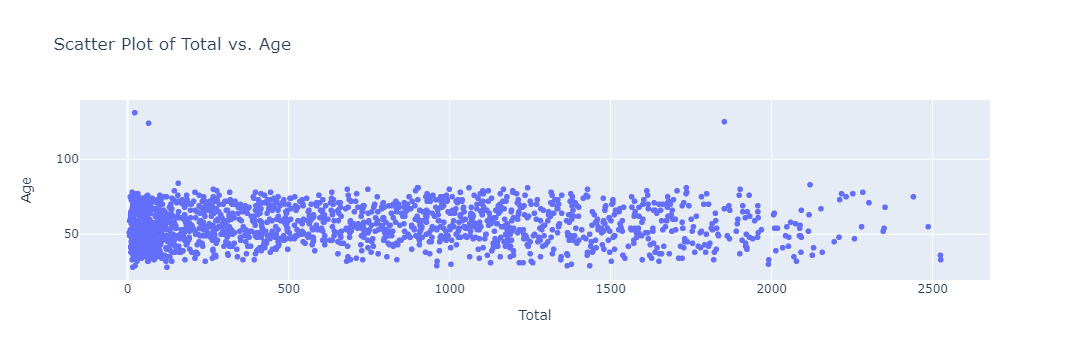

In [22]:
fig = px.scatter(data, x='Total', y='Age', title='Scatter Plot of Total vs. Age')
fig.update_xaxes(title_text='Total')
fig.update_yaxes(title_text='Age')
fig.show()

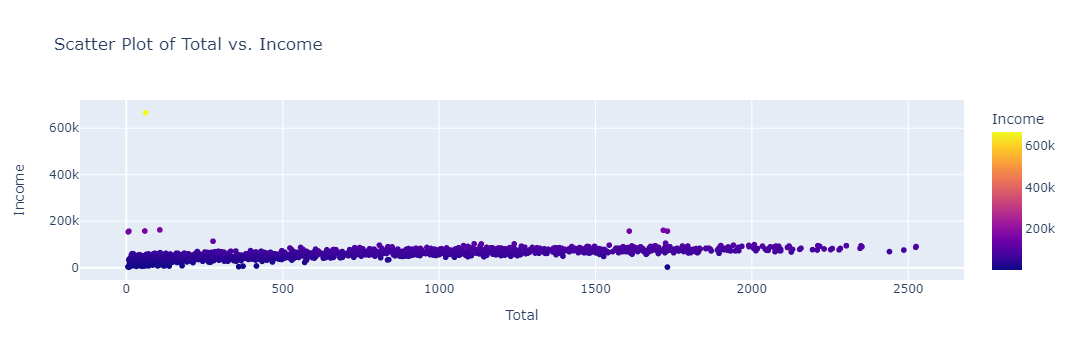

In [23]:
fig = px.scatter(data, x='Total', y='Income',color='Income', title='Scatter Plot of Total vs. Income')
fig.update_xaxes(title_text='Total')
fig.update_yaxes(title_text='Income')
fig.show()

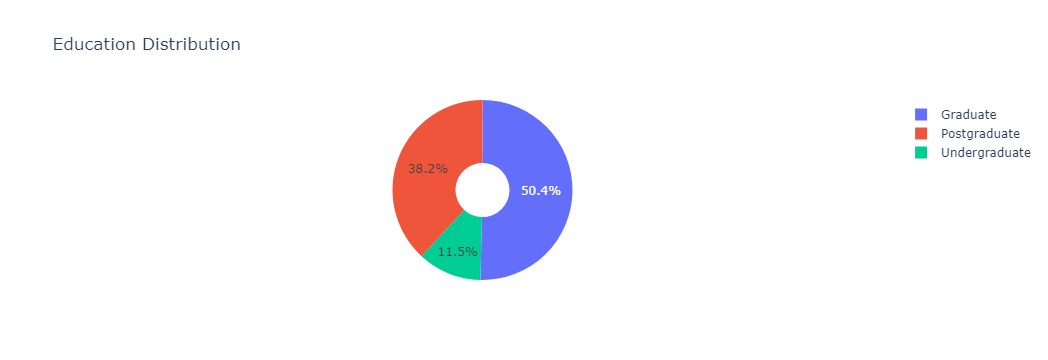

In [24]:
education_counts = data['Education'].value_counts()

fig = px.pie(values=education_counts, names=education_counts.index, 
             title='Education Distribution', 
             labels={'label': 'Education', 'value': 'Count'}, 
             hole=0.3)

fig.show()

From the above scatterplots we can see that there are some outliers present, checking for the same

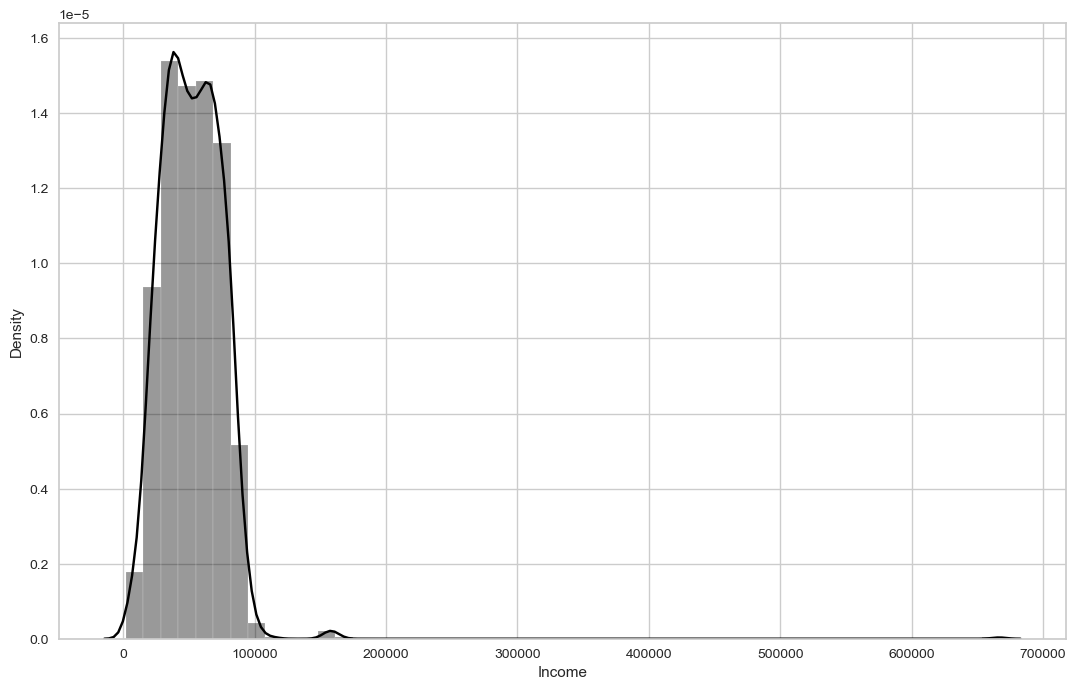

In [25]:
plt.figure(figsize=(13,8))
sns.distplot(data.Income, color='black');

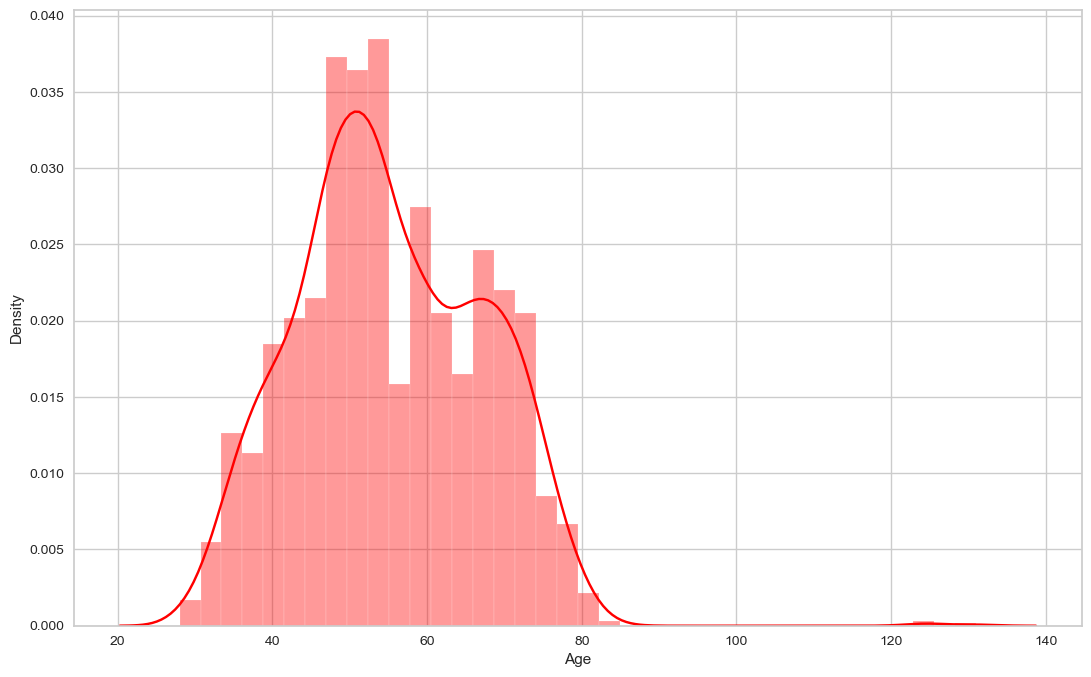

In [26]:
plt.figure(figsize=(13,8))
sns.distplot(data.Age, color='red');

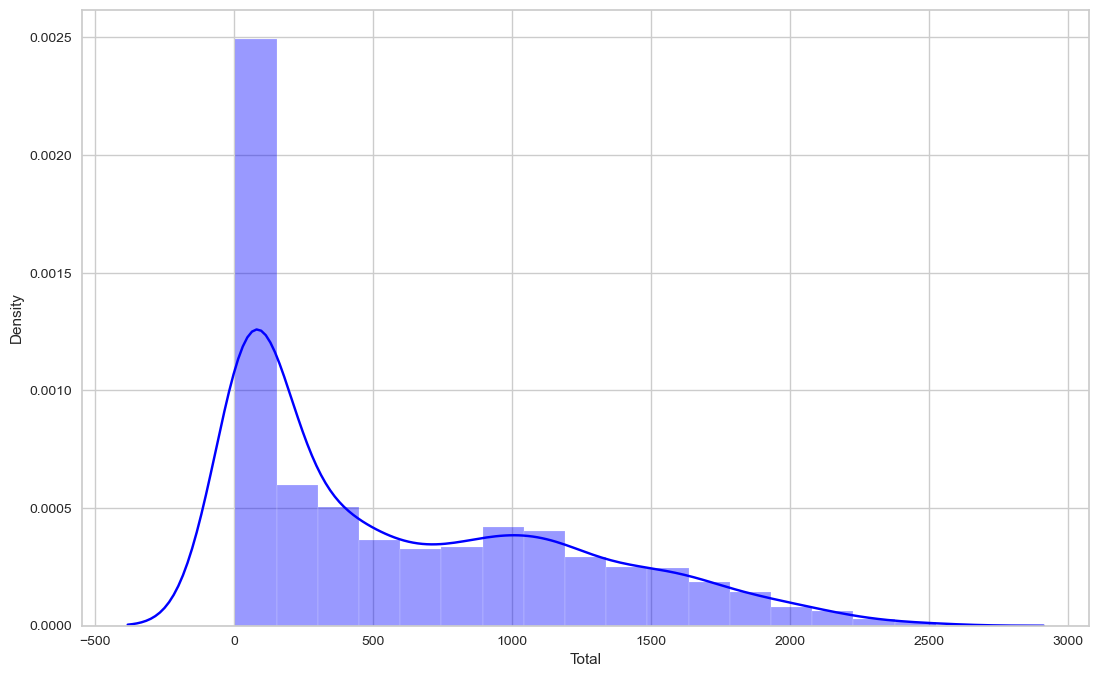

In [27]:
plt.figure(figsize=(13,8))
sns.distplot(data.Total, color='Blue');

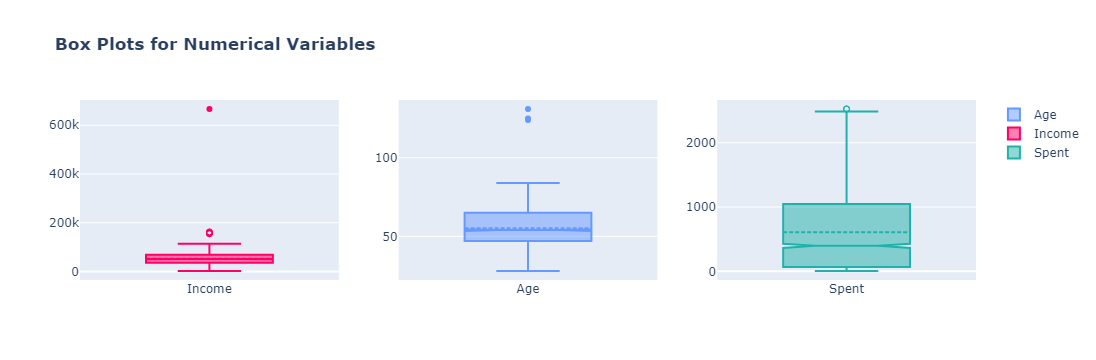

In [28]:
fig = make_subplots(rows=1, cols=3)

fig.add_trace(go.Box(y=data['Age'], notched=True, name='Age', marker_color='#6699ff', 
                     boxmean=True, boxpoints='suspectedoutliers'), row=1, col=2)
fig.add_trace(go.Box(y=data['Income'], notched=True, name='Income', marker_color='#ff0066', 
                     boxmean=True, boxpoints='suspectedoutliers'), row=1, col=1)
fig.add_trace(go.Box(y=data['Total'], notched=True, name='Spent', marker_color='lightseagreen', 
                     boxmean=True, boxpoints='suspectedoutliers'), row=1, col=3)
fig.update_layout(title_text='<b>Box Plots for Numerical Variables</b>')

fig.show()

In [29]:
def log_trans(d):
    return np.log1p(d)
for col in ['Income', 'Recency', 'Age', 'Total']:
    data[col] = log_trans(data[col])

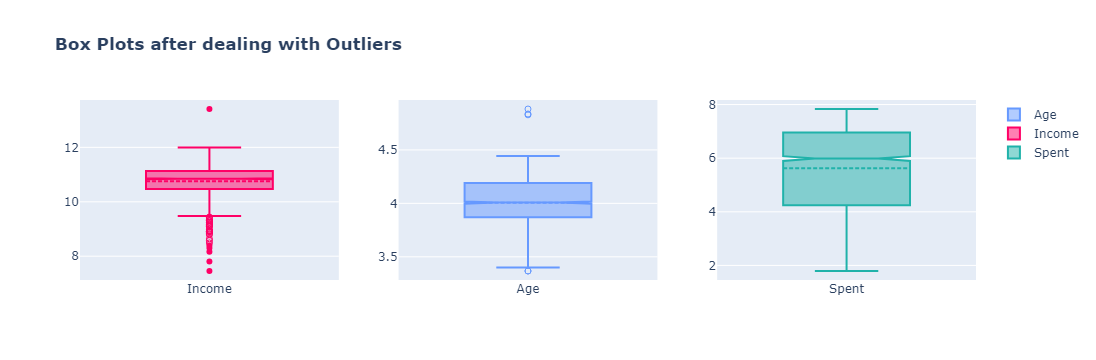

In [30]:
fig = make_subplots(rows=1, cols=3)

fig.add_trace(go.Box(y=data['Age'], notched=True, name='Age', marker_color='#6699ff', 
                     boxmean=True, boxpoints='suspectedoutliers'), row=1, col=2)
fig.add_trace(go.Box(y=data['Income'], notched=True, name='Income', marker_color='#ff0066', 
                     boxmean=True, boxpoints='suspectedoutliers'), row=1, col=1)
fig.add_trace(go.Box(y=data['Total'], notched=True, name='Spent', marker_color='lightseagreen', 
                     boxmean=True, boxpoints='suspectedoutliers'), row=1, col=3)
fig.update_layout(title_text='<b>Box Plots after dealing with Outliers</b>')

fig.show()

In [31]:
# encoding
data['Education'] = data['Education'].map({'Undergraduate':0,'Graduate':1, 'Postgraduate':2})

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2216 non-null   int64         
 1   Year_Birth           2216 non-null   int64         
 2   Education            2216 non-null   int64         
 3   Marital_Status       2216 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2216 non-null   int64         
 6   Teenhome             2216 non-null   int64         
 7   Dt_Customer          2216 non-null   datetime64[ns]
 8   Recency              2216 non-null   float64       
 9   MntWines             2216 non-null   int64         
 10  MntFruits            2216 non-null   int64         
 11  MntMeatProducts      2216 non-null   int64         
 12  MntFishProducts      2216 non-null   int64         
 13  MntSweetProducts     2216 non-null   i

In [33]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Year_Birth ', 'Age', 'Total',
       'num_children', 'num_family'],
      dtype='object')

In [34]:
int64_columns_to_keep = []
for col in data.columns:
    if data[col].dtype == 'int64':
        int64_columns_to_keep.append(col)

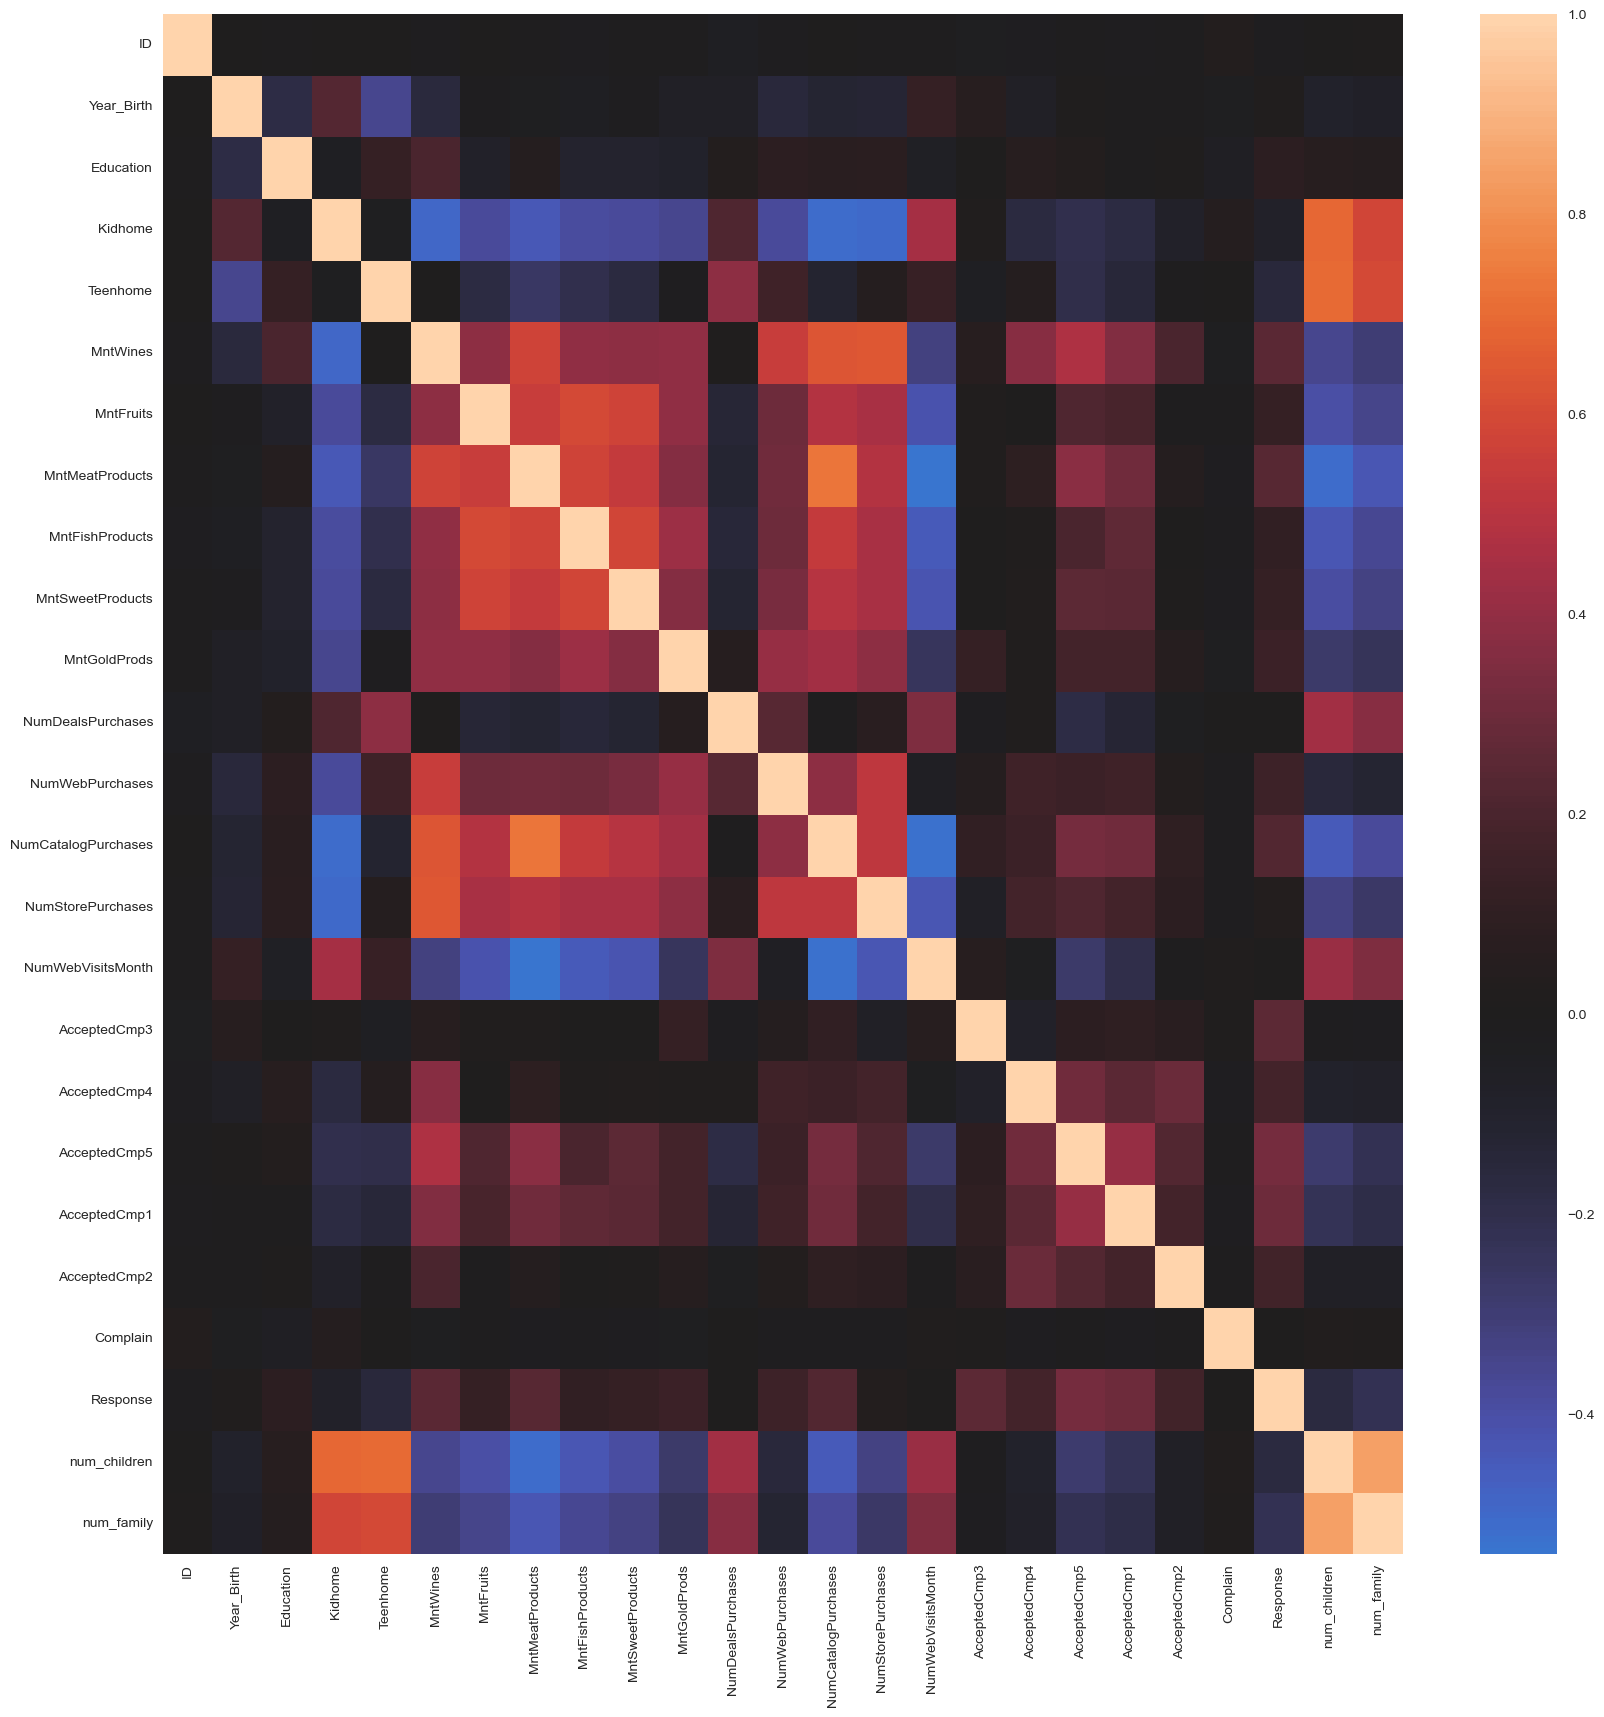

In [35]:
corr = data[int64_columns_to_keep].corr()
plt.figure(figsize=(20,20))  
sns.heatmap(corr, center = 0);

In [36]:
# creating a subset of dataframe by dropping the features on deals accepted and promotions
data = data.drop(['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response','Marital_Status','Dt_Customer','Year_Birth '], axis=1)

In [37]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   int64  
 3   Income               2216 non-null   float64
 4   Kidhome              2216 non-null   int64  
 5   Teenhome             2216 non-null   int64  
 6   Recency              2216 non-null   float64
 7   MntWines             2216 non-null   int64  
 8   MntFruits            2216 non-null   int64  
 9   MntMeatProducts      2216 non-null   int64  
 10  MntFishProducts      2216 non-null   int64  
 11  MntSweetProducts     2216 non-null   int64  
 12  MntGoldProds         2216 non-null   int64  
 13  NumDealsPurchases    2216 non-null   int64  
 14  NumWebPurchases      2216 non-null   int64  
 15  NumCatalogPurchases  2216 non-null   int64 

# <a name='Using ‘spending’ behaviour, classify the customers into atleast 4 categories.'></a>

<div style="border-radius:10px;
            background-color:#ffff00;
            border-style: solid;
            border-color: #0b0265;
            letter-spacing:0.5px;">

<center><h3 style="padding: 5px 0px; color:#000000; font-weight: bold; font-family: Cursive">
Using ‘spending’ behaviour, classify the customers into atleast 4 categories.</h3></center>
</div>

In [38]:
data1 = data.copy()

In [39]:
scaler = MinMaxScaler()
data = pd.DataFrame(scaler.fit_transform(data), columns = data.columns)

In [40]:
p = PCA(n_components=3)
p.fit(data)

PCA(n_components=3)

In [41]:
Vals = p.components_.T
Vals

array([[ 1.02369033e-02, -3.03951498e-02, -7.00753740e-03],
       [ 2.09327482e-02, -1.36205606e-01, -1.42754216e-02],
       [-2.06758355e-02,  5.03518748e-01, -8.19748506e-01],
       [-1.01150555e-01,  8.92841138e-02,  2.40779144e-02],
       [ 3.81656365e-01, -6.68557489e-02,  8.67611415e-03],
       [ 1.48681245e-01,  5.60641369e-01,  3.36107212e-01],
       [-2.18407984e-04,  2.86594365e-03,  3.37720835e-02],
       [-3.01521486e-01,  2.20436637e-01,  1.01670200e-02],
       [-2.40299370e-01, -1.51060273e-02,  1.23617809e-01],
       [-1.76383260e-01,  5.40366519e-03,  4.63703363e-03],
       [-2.65371114e-01, -3.16528655e-02,  1.41970416e-01],
       [-1.82325124e-01, -1.16003228e-02,  1.03864376e-01],
       [-1.56914360e-01,  4.26536654e-02,  1.29306970e-01],
       [ 4.84043450e-02,  1.37046210e-01,  1.06007037e-01],
       [-9.33001212e-02,  1.00942091e-01,  6.11555927e-02],
       [-1.40810074e-01,  4.22751873e-02,  2.21295121e-02],
       [-3.33745507e-01,  2.27135838e-01

In [42]:
pd.DataFrame(Vals, index=data.columns, columns=['1','2','3'])

1         2         3
ID                   0.010237 -0.030395 -0.007008
Year_Birth           0.020933 -0.136206 -0.014275
Education           -0.020676  0.503519 -0.819749
Income              -0.101151  0.089284  0.024078
Kidhome              0.381656 -0.066856  0.008676
Teenhome             0.148681  0.560641  0.336107
Recency             -0.000218  0.002866  0.033772
MntWines            -0.301521  0.220437  0.010167
MntFruits           -0.240299 -0.015106  0.123618
MntMeatProducts     -0.176383  0.005404  0.004637
MntFishProducts     -0.265371 -0.031653  0.141970
MntSweetProducts    -0.182325 -0.011600  0.103864
MntGoldProds        -0.156914  0.042654  0.129307
NumDealsPurchases    0.048404  0.137046  0.106007
NumWebPurchases     -0.093300  0.100942  0.061156
NumCatalogPurchases -0.140810  0.042275  0.022130
NumStorePurchases   -0.333746  0.227136  0.149428
NumWebVisitsMonth    0.129221 -0.007759  0.004098
Age                 -0.020385  0.178220  0.022323
Total               -0.383985  0.215535  0.117508
num_children         0.353558  0.329190  0.229856
num_family           0.284870  0.281826  0.212069

In [43]:
p.explained_variance_ratio_

array([0.32851   , 0.15853069, 0.10910364])

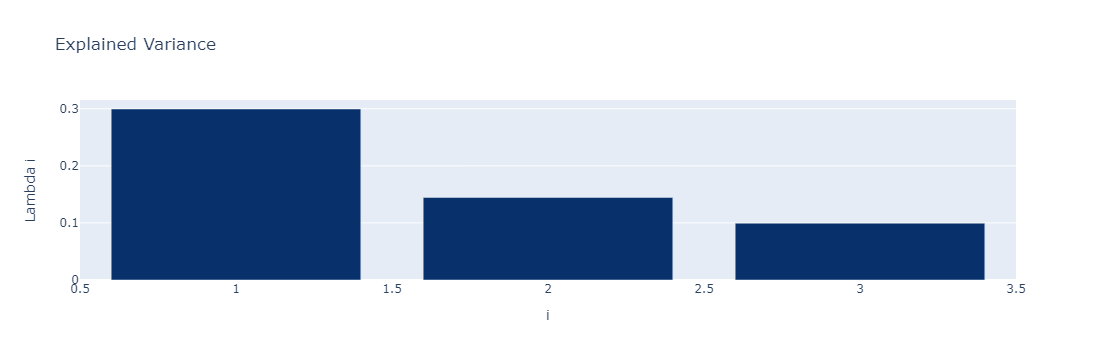

In [44]:
x_values = list(range(1, 4))
y_values = p.explained_variance_
fig = go.Figure(data=[go.Bar(x=x_values, y=y_values, marker_color='rgb(8, 48, 107)')])
fig.update_layout(title='Explained Variance',
                  xaxis_title='i',yaxis_title='Lambda i')
fig.show()

In [45]:
data_PCA = pd.DataFrame(p.transform(data), columns=(['1', '2', '3']))

In [46]:
x = data_PCA['1']
y = data_PCA['2']
z = data_PCA['3']

fig = go.Figure(data=[go.Scatter3d(x=x, y=y, z=z, mode='markers', marker=dict(color='pink', size=5))])

fig.update_layout(scene=dict(xaxis_title='1',
                             yaxis_title='2',
                             zaxis_title='3'),
                  title='A 3D Projection of Data In the Reduced Dimension',
                  width=1000,
                  height=800)
fig.show()

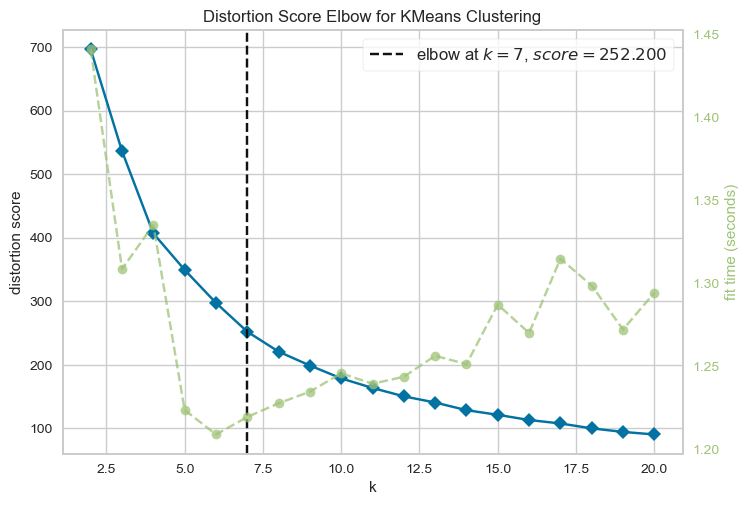

In [47]:
Elbow_M = KElbowVisualizer(KMeans(), k=20)
Elbow_M.fit(data_PCA)
Elbow_M.show();

So what we find here is the optimal number of clusters should be 7 but we will go with 4 as the problem requires us to group it in 4 groups

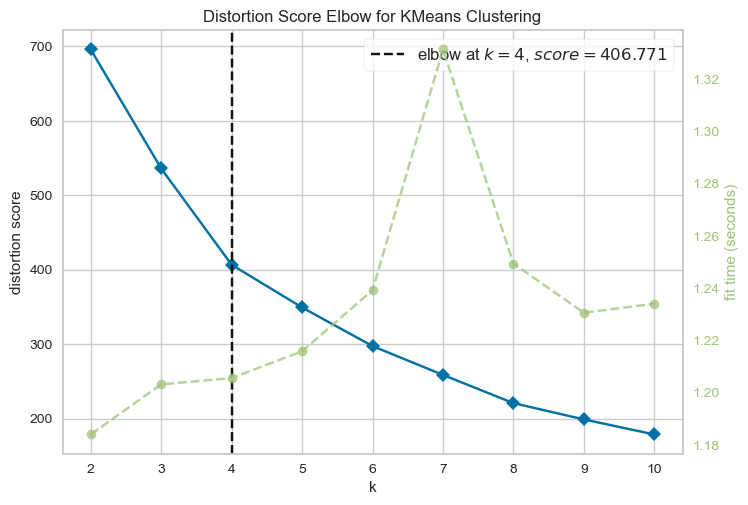

In [48]:
Elbow_M2 = KElbowVisualizer(KMeans(), k=10)
Elbow_M2.fit(data_PCA)
Elbow_M2.show();

Now the Elbow fit gives 4 as optimal groups

In [49]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4,random_state=42)
yhat_kmeans = kmeans.fit_predict(data_PCA)
data_PCA['Clusters'] = yhat_kmeans
data['Clusters'] = yhat_kmeans
data1['Clusters'] = yhat_kmeans

In [50]:
fig = go.Figure()
fig.add_trace(go.Scatter3d(x=x, y=y, z=z, 
                           mode='markers', 
                           marker=dict(size=8, color=data_PCA['Clusters'], colorscale='viridis', opacity=0.8)))

fig.update_layout(scene=dict(xaxis=dict(title='X'), 
                             yaxis=dict(title='Y'), 
                             zaxis=dict(title='Z')),
                  title='Clusters',
                  width=1000,
                  height=800 
                 )
fig.show()

In [51]:
fig = px.scatter(data1, x='Total', y='Income', color='Clusters', 
                 title="Cluster's Profile Based on Income and Total")
fig.update_layout(width=1000, height=600)
fig.show()


Cluster 0 (Blue): Represents individuals with lower income and spending levels.


Cluster 1 (Purple): Comprises individuals with moderate income and spending.


Cluster 2 (Orange) and Cluster 3 (Yellow): Consist of individuals with higher income and spending, potentially indicating affluent segments.

Noticeable outlier points, especially towards the upper end of the income and spending scales, suggest unique cases or anomalies within our dataset.

# <a name='What are the characteristics of customers who are the highest buyers of Meat products?'></a>

<div style="border-radius:10px;
            background-color:#ffff00;
            border-style: solid;
            border-color: #0b0265;
            letter-spacing:0.5px;">

<center><h3 style="padding: 5px 0px; color:#000000; font-weight: bold; font-family: Cursive">
What are the characteristics of customers who are the highest buyers of Meat products?</h3></center>
</div>

In [52]:
data1.columns

Index(['ID', 'Year_Birth', 'Education', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Age', 'Total',
       'num_children', 'num_family', 'Clusters'],
      dtype='object')

In [53]:
# checking where does the most number of customers lie in our clusters who purchase meat
cluster_summary = data1.groupby('Clusters').agg({
    'ID': 'count',
    'MntMeatProducts': 'sum'
}).reset_index()
cluster_summary['Avg_Meat_Purchase'] = cluster_summary['MntMeatProducts'] / cluster_summary['ID']
most_customers_cluster = cluster_summary.loc[cluster_summary['Avg_Meat_Purchase'].idxmax()]
print("Cluster with the most customers who purchase meat:")
print(most_customers_cluster)


Cluster with the most customers who purchase meat:
Clusters                  3.000000
ID                      526.000000
MntMeatProducts      234978.000000
Avg_Meat_Purchase       446.726236
Name: 3, dtype: float64


In [54]:
fig = px.bar(cluster_summary, x='Clusters', y='Avg_Meat_Purchase', 
             title='Average Meat Purchase Amount per Customer by Cluster',
             labels={'Clusters': 'Cluster', 'Avg_Meat_Purchase': 'Average Meat Purchase Amount'},
             color='Clusters',
             color_discrete_sequence=px.colors.qualitative.Set1)

fig.update_layout(xaxis_title='Cluster', yaxis_title='Average Meat Purchase Amount')

fig.show()

Cluster 0 (Blue): This cluster has the lowest average meat purchase amount per customer, indicated by the shortest blue bar.

Cluster 1 (Purple): This cluster demonstrates a moderate average meat purchase amount per customer, depicted by the moderate-sized orange bar.

Cluster 2 (Orange): The orange cluster shows a considerable average meat purchase amount per customer, though not as high as the purple cluster, as shown by the orange bar.

Cluster 3 (Yellow): The Yellow cluster stands out with the highest average meat purchase amount per customer, as evidenced by the tallest yellow bar.

So basically the people who have high income are the frequent buyer of meat.

Insights into Meat Purchasing Behavior: The chart suggests varying meat purchasing behaviors across different customer segments. Yellow and orange clusters are likely the biggest consumers of meat, while blue and purple clusters may have relatively lower meat consumption.

# <a name='a) Which new customers can the company target for high-cost products?'></a>

<div style="border-radius:10px;
            background-color:#ffff00;
            border-style: solid;
            border-color: #0b0265;
            letter-spacing:0.5px;">

<center><h3 style="padding: 5px 0px; color:#000000; font-weight: bold; font-family: Cursive">
a) Which new customers can the company target for high-cost products?</h3></center>
</div>

From our clustering we can target the customers in cluster 2 and 3, as they have the high income and high spending, we have also produced the answer based on the original dataframe

In [55]:
new_customers = df[df['Dt_Customer'] > '2014-01-01']

target_high_income = new_customers[new_customers['Income'] > 60000]  
target_high_spending = new_customers[(new_customers['MntGoldProds'] > 100) | (new_customers['MntWines'] > 500)]  
target_high_cost_products = pd.concat([target_high_income, target_high_spending]).drop_duplicates()

target_high_cost_products

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
23    4047        1954         PhD        Married  65324.0        0         1   
45    1371        1976  Graduation         Single  79941.0        0         0   
50    8614        1957  Graduation          Widow  65486.0        0         1   
53    2225        1977  Graduation       Divorced  82582.0        0         0   
67    9369        1979    2n Cycle         Single  88194.0        0         1   
...    ...         ...         ...            ...      ...      ...       ...   
1479  9559        1961         PhD        Married  57072.0        0         1   
1703  1958        1973         PhD       Together  55012.0        0         1   
2158  5186        1955         PhD        Married  58482.0        0         1   
2224  4286        1970         PhD         Single  57642.0        0         1   
2237  7270        1981  Graduation       Divorced  56981.0        0         0   

     Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
23    2014-01-11        0       384  ...                  4             0   
45    2014-06-28       72       123  ...                  1             0   
50    2014-05-12       29       245  ...                  2             0   
53    2014-06-07       54       510  ...                  1             1   
67    2014-03-19       19       688  ...                  5             1   
...          ...      ...       ...  ...                ...           ...   
1479  2014-01-24       79       944  ...                  5             1   
1703  2014-03-21       85       582  ...                  5             0   
2158  2014-03-12       59       576  ...                  6             0   
2224  2014-01-09       24       580  ...                  4             1   
2237  2014-01-25       91       908  ...                  6             0   

      AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
23               0             0             0             0         0   
45               0             0             0             0         0   
50               0             0             0             0         0   
53               0             0             1             0         0   
67               0             0             1             0         0   
...            ...           ...           ...           ...       ...   
1479             0             0             0             0         0   
1703             0             0             0             0         0   
2158             1             0             0             0         0   
2224             0             0             0             0         0   
2237             1             0             0             0         0   

      Z_CostContact  Z_Revenue  Response  
23                3         11         0  
45                3         11         0  
50                3         11         0  
53                3         11         1  
67                3         11         1  
...             ...        ...       ...  
1479              3         11         0  
1703              3         11         0  
2158              3         11         0  
2224              3         11         0  
2237              3         11         0  

[228 rows x 29 columns]

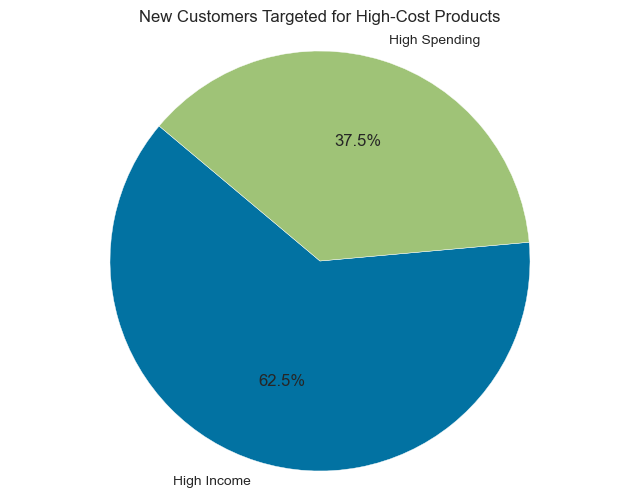

In [56]:
plt.figure(figsize=(8, 6))
labels = ['High Income', 'High Spending']
sizes = [len(target_high_income), len(target_high_spending)]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('New Customers Targeted for High-Cost Products')
plt.axis('equal')
plt.show()

# <a name='b) Which old customers has the company consistently relied on?'></a>

<div style="border-radius:10px;
            background-color:#ffff00;
            border-style: solid;
            border-color: #0b0265;
            letter-spacing:0.5px;">

<center><h3 style="padding: 5px 0px; color:#000000; font-weight: bold; font-family: Cursive">
b) Which old customers has the company consistently relied on?</h3></center>
</div>

In [57]:
old_customers = df[df['Dt_Customer'] <= '2013-01-01']

customer_summary = old_customers.groupby('ID').agg({'Recency': 'min', 'NumStorePurchases': 'sum', 'Income': 'mean'})

reliable_customers = customer_summary[(customer_summary['Recency'] < 30) & (customer_summary['NumStorePurchases'] > 10)] 
reliable_customers

Recency  NumStorePurchases   Income
ID                                       
618        17                 12  69389.0
709        27                 11  51537.0
1351       25                 13  58656.0
1911        6                 12  67430.0
2114       23                 12  82800.0
3076       18                 12  66653.0
3403       11                 12  78952.0
4114        2                 13  79143.0
4261       23                 12  82800.0
4945       29                 12  53653.0
5031       14                 11  83145.0
5453       26                 12  90226.0
7022        2                 13  76445.0
7342        6                 12  59184.0

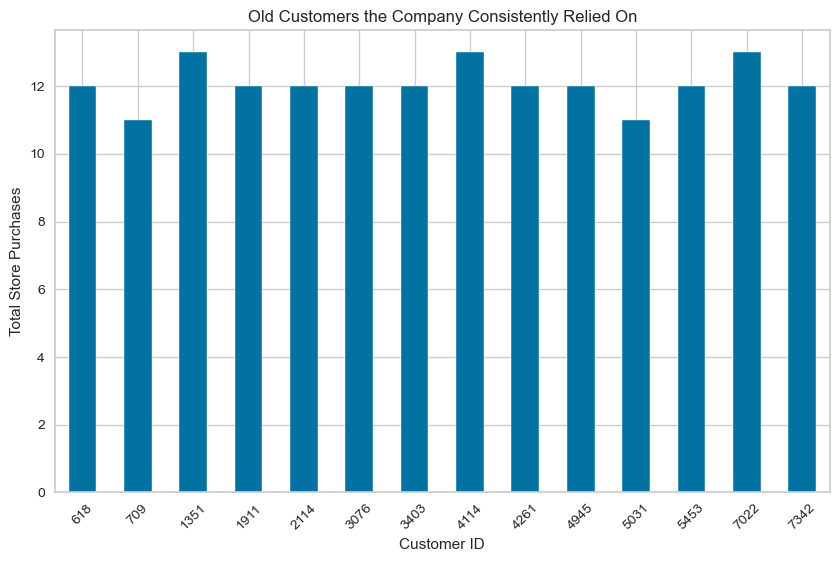

In [58]:
plt.figure(figsize=(10, 6))
reliable_customers['NumStorePurchases'].plot(kind='bar')
plt.title('Old Customers the Company Consistently Relied On')
plt.xlabel('Customer ID')
plt.ylabel('Total Store Purchases')
plt.xticks(rotation=45)
plt.show()

# <a name='c) For which old customers are targeting efforts, not going to yield much benefit?'></a>

<div style="border-radius:10px;
            background-color:#ffff00;
            border-style: solid;
            border-color: #0b0265;
            letter-spacing:0.5px;">

<center><h3 style="padding: 5px 0px; color:#000000; font-weight: bold; font-family: Cursive">
c) For which old customers are targeting efforts, not going to yield much benefit?</h3></center>
</div>

In [59]:
low_engagement_customers = customer_summary[(customer_summary['Recency'] > 90) | (customer_summary['NumStorePurchases'] < 5)]  
low_engagement_customers

Recency  NumStorePurchases   Income
ID                                        
9           86                  2  46098.0
22          99                  5  46310.0
35          35                  3  25545.0
195         21                  4  38808.0
234         60                  2  15287.0
...        ...                ...      ...
10913       56                  2  31385.0
10971       28                  3  37774.0
10991       18                  4  89058.0
10995        8                  4  15716.0
11121       76                  3  19419.0

[231 rows x 3 columns]

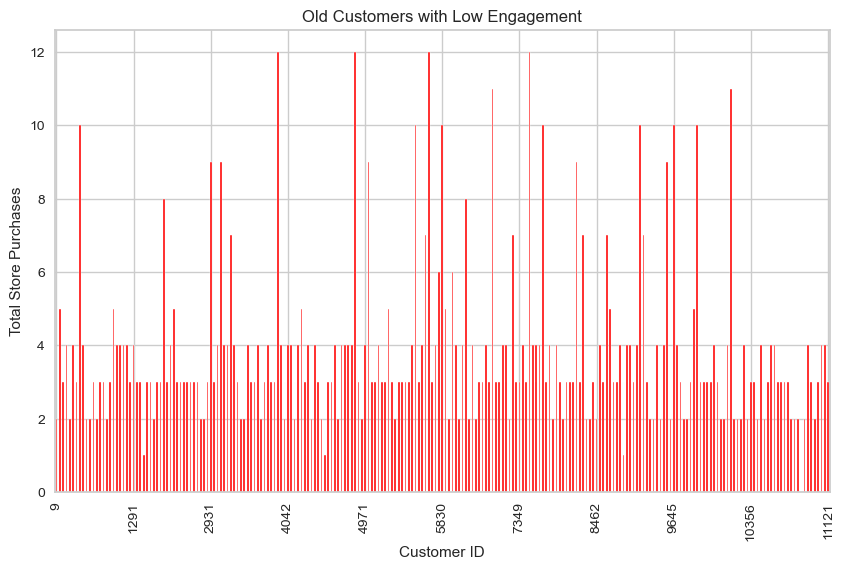

In [60]:
plt.figure(figsize=(10, 6))
ax = low_engagement_customers['NumStorePurchases'].plot(kind='bar', color='red')
plt.title('Old Customers with Low Engagement')
plt.xlabel('Customer ID')
plt.ylabel('Total Store Purchases')

plt.xticks(rotation=90)

n = 10  
ticks = ax.xaxis.get_ticklocs()
ticklabels = [int(float(l.get_text())) for l in ax.xaxis.get_ticklabels()]
ax.xaxis.set_ticks(ticks[::len(ticks)//n])
ax.xaxis.set_ticklabels(ticklabels[::len(ticks)//n])

plt.show()

# <a name='d) Which new customers have the danger of going into territory-c?'></a>

<div style="border-radius:10px;
            background-color:#ffff00;
            border-style: solid;
            border-color: #0b0265;
            letter-spacing:0.5px;">

<center><h3 style="padding: 5px 0px; color:#000000; font-weight: bold; font-family: Cursive">
d) Which new customers have the danger of going into territory-c?</h3></center>
</div>

In [61]:
low_spending_new_customers = new_customers[(new_customers['MntWines'] < 50) & (new_customers['MntFruits'] < 10)]
low_spending_new_customers.head(5)

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
1   2174        1954  Graduation         Single  46344.0        1         1   
3   6182        1984  Graduation       Together  26646.0        1         0   
9   5899        1950         PhD       Together   5648.0        1         1   
30  6864        1989      Master       Divorced  10979.0        0         0   
57  7437        1988  Graduation         Single  27938.0        1         0   

   Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
1   2014-03-08       38        11  ...                  5             0   
3   2014-02-10       26        11  ...                  6             0   
9   2014-03-13       68        28  ...                 20             1   
30  2014-05-22       34         8  ...                  5             0   
57  2014-04-28       31        13  ...                  3             0   

    AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
1              0             0             0             0         0   
3              0             0             0             0         0   
9              0             0             0             0         0   
30             0             0             0             0         0   
57             0             0             0             0         0   

    Z_CostContact  Z_Revenue  Response  
1               3         11         0  
3               3         11         0  
9               3         11         0  
30              3         11         0  
57              3         11         0  

[5 rows x 29 columns]

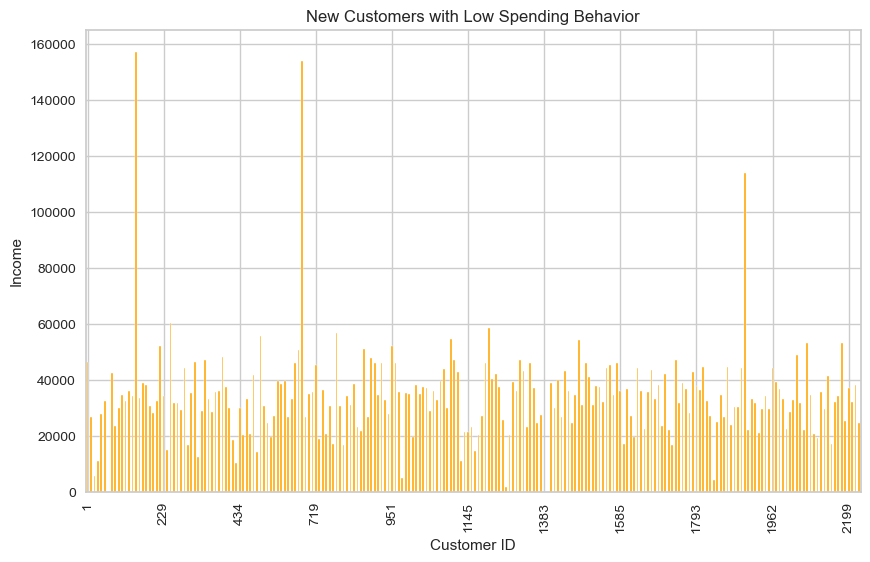

In [62]:
plt.figure(figsize=(10, 6))
ax = low_spending_new_customers['Income'].plot(kind='bar', color='orange')
plt.title('New Customers with Low Spending Behavior')
plt.xlabel('Customer ID')
plt.ylabel('Income')

plt.xticks(rotation=90)

n = 10  
ticks = ax.xaxis.get_ticklocs()
ticklabels = [int(float(l.get_text())) for l in ax.xaxis.get_ticklabels()]
ax.xaxis.set_ticks(ticks[::len(ticks)//n])
ax.xaxis.set_ticklabels(ticklabels[::len(ticks)//n])

plt.show()